# Testing the Model on Unseen Data
- Tuning preprocessing parameters for my handwritten numbers and evaluating the chosen neural network with the best parameters


In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import functions.preprocess_my_numbers as my_pr
import importlib
import functions.training as my_tr
import torch

importlib.reload(my_tr)
importlib.reload(my_pr)

<module 'functions.preprocess_my_numbers' from 'C:\\Users\\piecz\\PycharmProjects\\basic_of_ml_image_classification\\functions\\preprocess_my_numbers.py'>

### Loading labelled data

In [2]:
IMAGE_DIR = "data//images_labelled"

image_paths = [
    os.path.join(IMAGE_DIR, fname)
    for fname in os.listdir(IMAGE_DIR)
    if fname.lower().endswith(".png")
]

print(f"{len(image_paths)} images was founded")

86 images was founded


### Loading model trained at MNIST

In [16]:
type = 3
hidden_size = [512,256]

if type == 2:
    model_loaded = my_tr.TwoLayerNet(hidden_size)
    path = f"data/models/two-layer_hidden-size-{hidden_size}_params.pth"
elif type == 3:
    model_loaded = my_tr.ThreeLayerNet(*hidden_size)
    path = f"data/models/three-layer_hidden-size-{hidden_size[0]}-{hidden_size[1]}_params.pth"

model_loaded.load_state_dict(torch.load(path))
model_loaded.eval()

ThreeLayerNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

### Tuning

In [17]:
from itertools import product

digit_sizes =   [20,24,26]   
margins = [2, 4, 6]              
blur_ksizes = [0, 1, 3, 5]             
new_heights = [28, 56, 112]           


grid = list(product(digit_sizes, margins, blur_ksizes, new_heights))

print(f"Number of combinartions: {len(grid)}")

best_acc = 0
best_params = None
j =0

for digit_size,margin,blur_ksize, new_height in grid:
    j+=1
    print(f"{j} of {len(grid)}")
    
    whole_num_res = []
    digit_res = []
    
    wrong_split = 0
    for p in image_paths:
        label = p.split("\\")[-1].split("-")[0]  
        label_list = list(label)
        img = Image.open(p).convert('L')
        img_resized = my_pr.resize(img,new_height= new_height)
        digits = my_pr.split_to_digits(img_resized)    
        digits = my_pr.prepare_digits_for_mnist(digits,blur_ksize=blur_ksize,n=digit_size,margin = margin)

        
        if len(digits) != len(label_list):
            wrong_split +=1
            continue
        
        number = []
        result = []
        
        for i,d in zip(label_list,digits):
            d_tensor = torch.tensor(d).unsqueeze(0)
            output = model_loaded(d_tensor)
            pred = torch.argmax(output, dim=1).item()
            result.append((int(i), int(pred)))
            number.append(pred)
            
        number = int(''.join(str(n) for n in number))
        digit_res = digit_res + result
        global_res = len([(x,y) for x ,y in result if x==y])/len(result)
        whole_num_res.append((int(label), number, global_res))
                
    correct = sum(1 for t, p in digit_res if t == p)
    total = len(digit_res)
    
    accuracy = correct / total if total > 0 else 0.0
    
    if accuracy > best_acc:
        best_acc = accuracy 
        best_params = (digit_size,margin,blur_ksize, new_height)
    
    print("digit_size,margin,blur_ksize, new_height")
    print(digit_size,margin,blur_ksize, new_height)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Number of wrong splits: {wrong_split} of {len(image_paths)}")
    print("----\n")
print(best_acc, best_params)

Number of combinartions: 108
1 of 108
digit_size,margin,blur_ksize, new_height
20 2 0 28
Accuracy: 0.6944
Number of wrong splits: 3 of 86
----

2 of 108
digit_size,margin,blur_ksize, new_height
20 2 0 56
Accuracy: 0.7597
Number of wrong splits: 2 of 86
----

3 of 108
digit_size,margin,blur_ksize, new_height
20 2 0 112
Accuracy: 0.7597
Number of wrong splits: 2 of 86
----

4 of 108
digit_size,margin,blur_ksize, new_height
20 2 1 28
Accuracy: 0.6944
Number of wrong splits: 3 of 86
----

5 of 108
digit_size,margin,blur_ksize, new_height
20 2 1 56
Accuracy: 0.7597
Number of wrong splits: 2 of 86
----

6 of 108
digit_size,margin,blur_ksize, new_height
20 2 1 112
Accuracy: 0.7597
Number of wrong splits: 2 of 86
----

7 of 108
digit_size,margin,blur_ksize, new_height
20 2 3 28
Accuracy: 0.6944
Number of wrong splits: 3 of 86
----

8 of 108
digit_size,margin,blur_ksize, new_height
20 2 3 56
Accuracy: 0.7890
Number of wrong splits: 2 of 86
----

9 of 108
digit_size,margin,blur_ksize, new_height

### Evaluation at chosen parameters

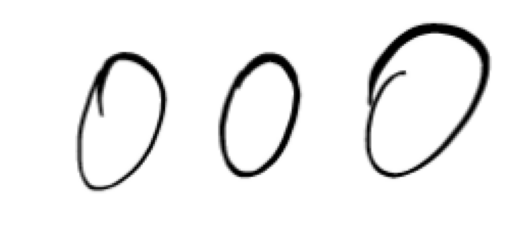

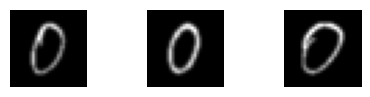

True: 000
Prediction: 9
----



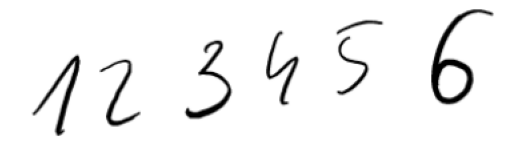

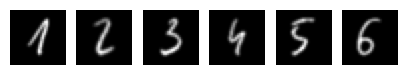

True: 123456
Prediction: 123488
----



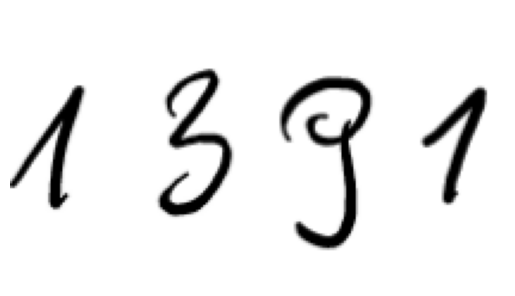

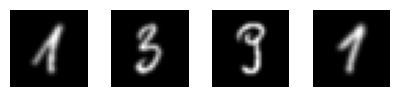

True: 1391
Prediction: 1331
----



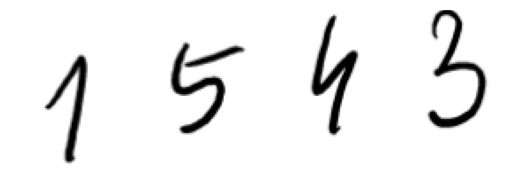

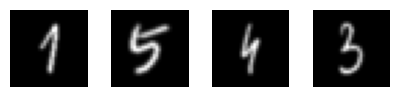

True: 1543
Prediction: 1943
----



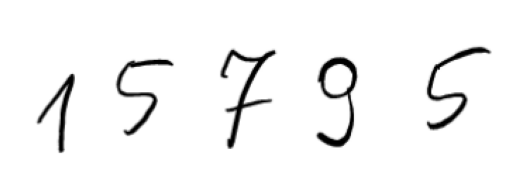

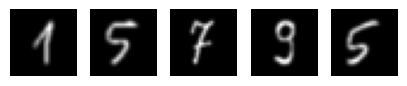

True: 15795
Prediction: 18838
----



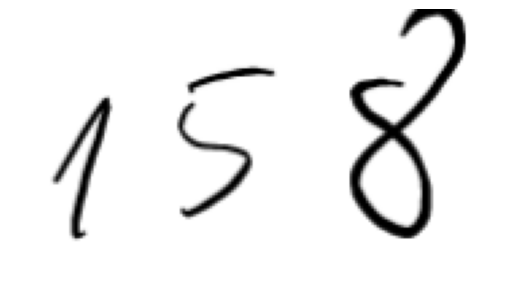

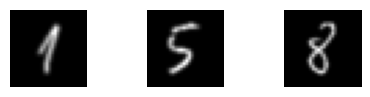

True: 158
Prediction: 188
----



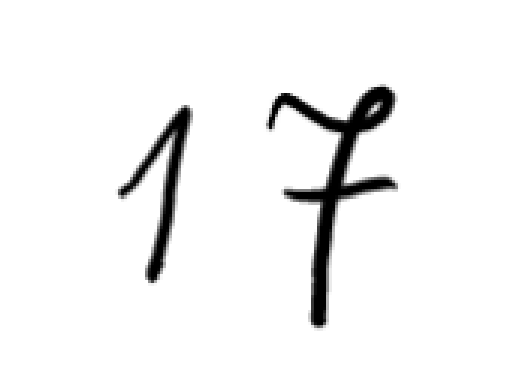

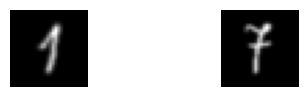

True: 17
Prediction: 13
----



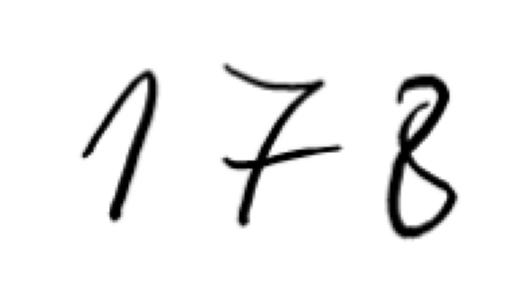

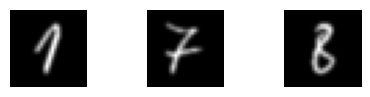

True: 178
Prediction: 181
----



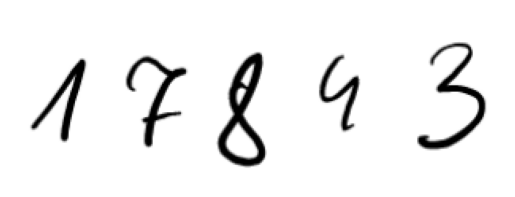

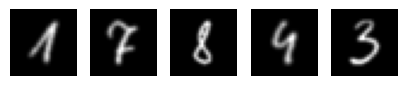

True: 17843
Prediction: 17143
----



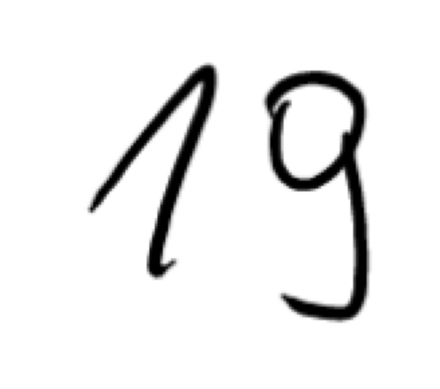

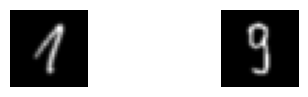

True: 19
Prediction: 13
----



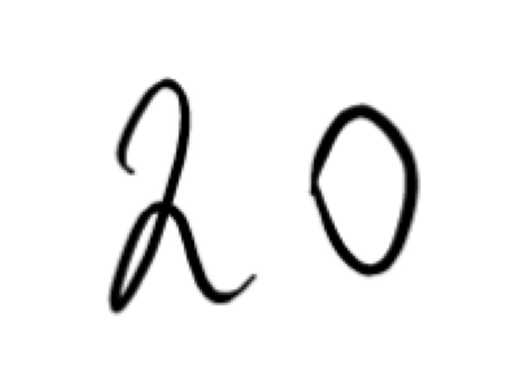

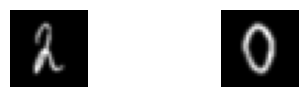

True: 20
Prediction: 80
----



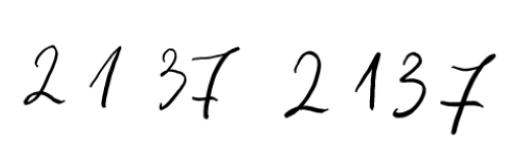

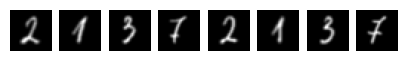

True: 21372137
Prediction: 21112131
----



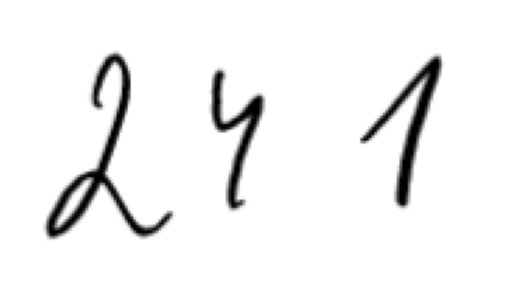

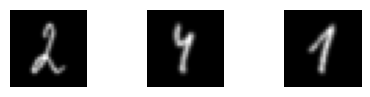

True: 241
Prediction: 211
----



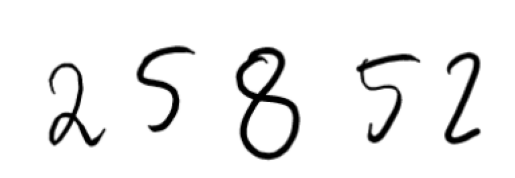

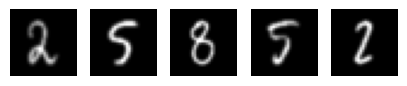

True: 25852
Prediction: 25882
----



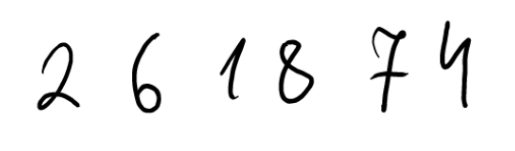

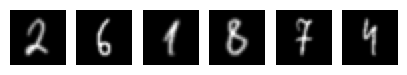

True: 261874
Prediction: 261671
----



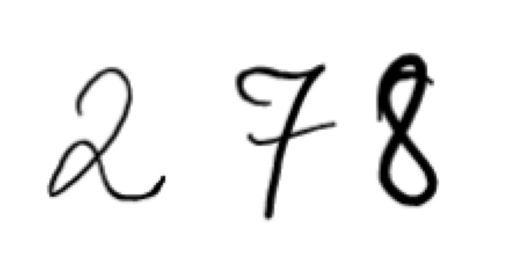

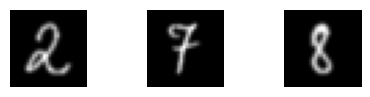

True: 278
Prediction: 238
----



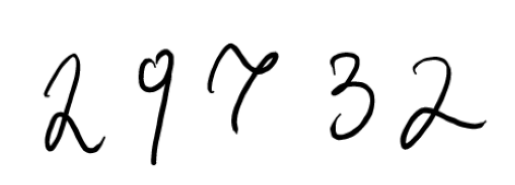

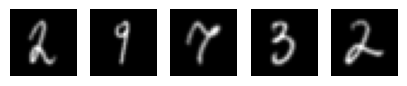

True: 29732
Prediction: 81732
----



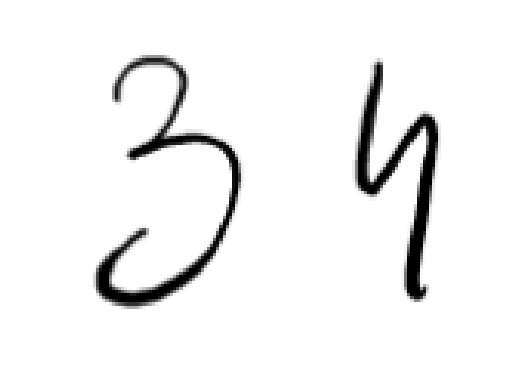

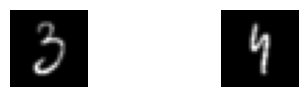

True: 34
Prediction: 31
----



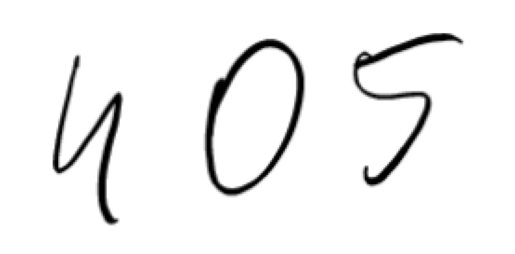

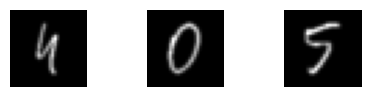

True: 405
Prediction: 408
----



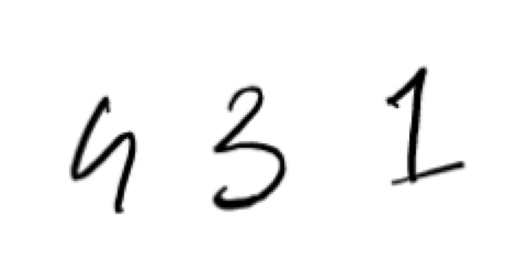

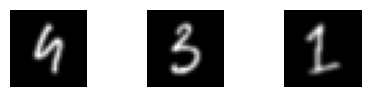

True: 431
Prediction: 955
----



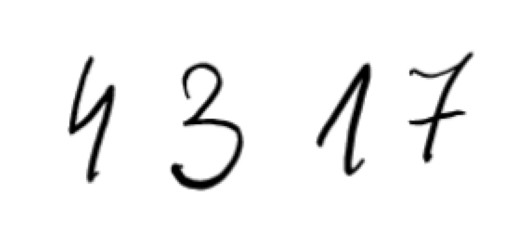

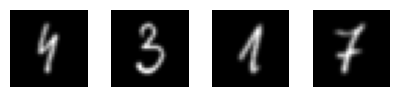

True: 4317
Prediction: 4311
----



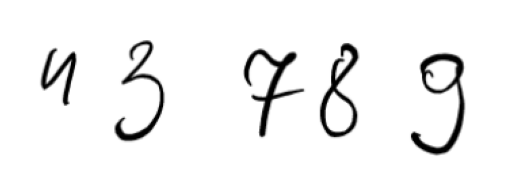

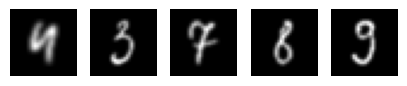

True: 43789
Prediction: 43713
----



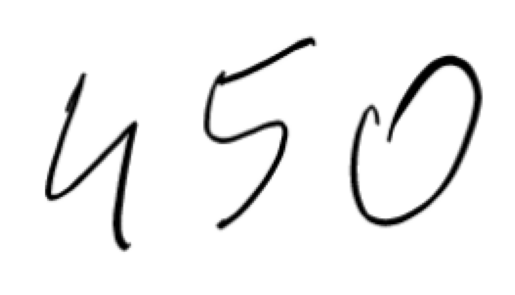

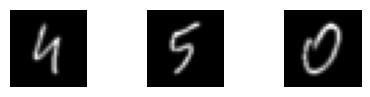

True: 450
Prediction: 490
----



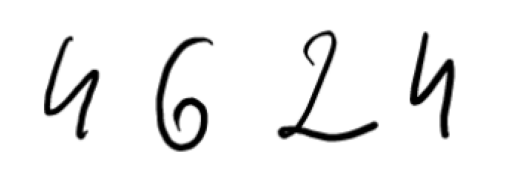

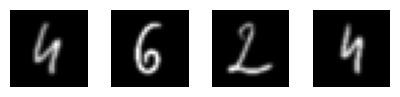

True: 4624
Prediction: 4654
----



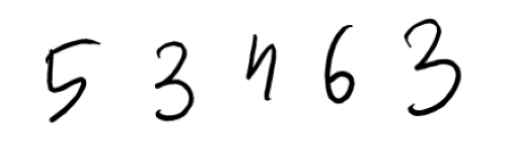

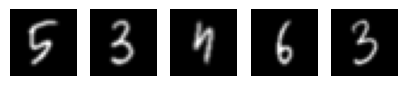

True: 53463
Prediction: 83463
----



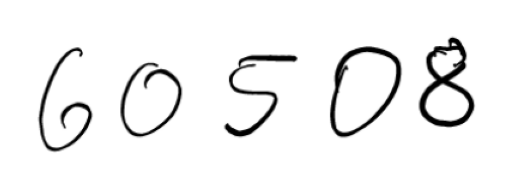

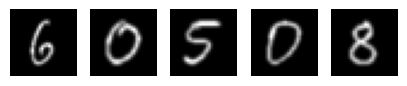

True: 60508
Prediction: 80593
----



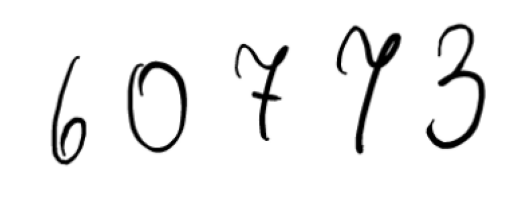

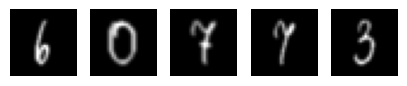

True: 60773
Prediction: 60713
----



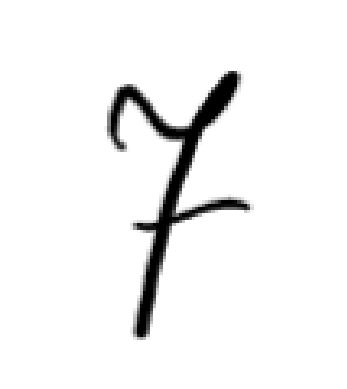

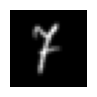

True: 7
Prediction: 8
----



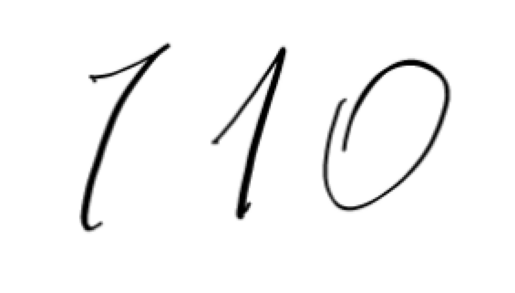

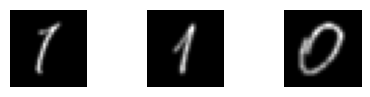

True: 710
Prediction: 610
----



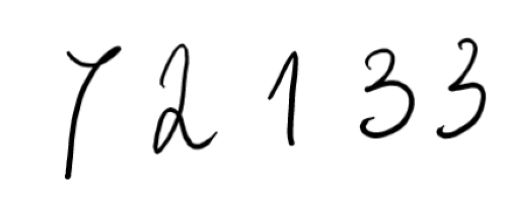

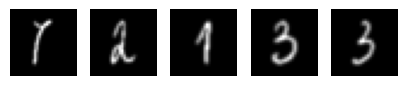

True: 72133
Prediction: 82133
----



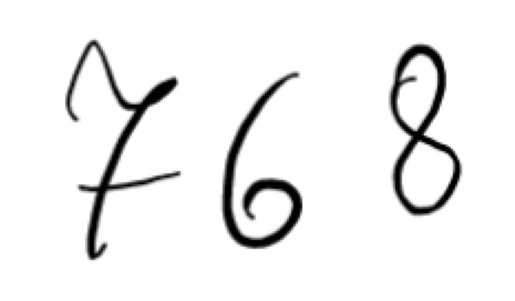

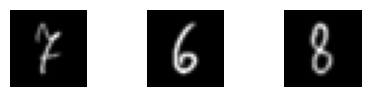

True: 768
Prediction: 168
----



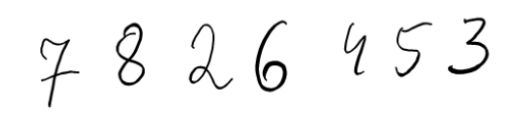

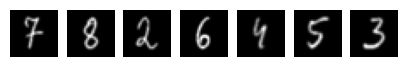

True: 7826453
Prediction: 8826453
----



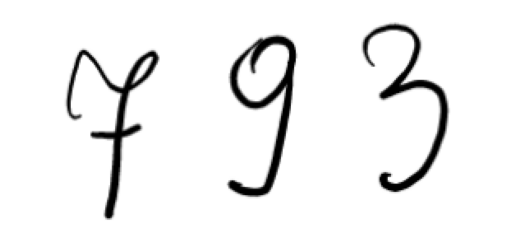

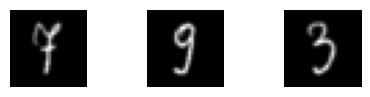

True: 793
Prediction: 313
----



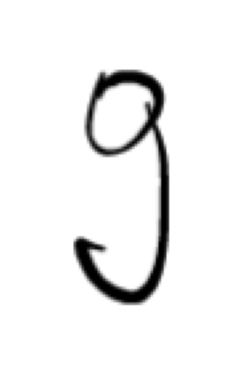

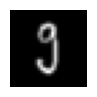

True: 9
Prediction: 3
----

ERROR!!!
number of detected digits: 2 (3)


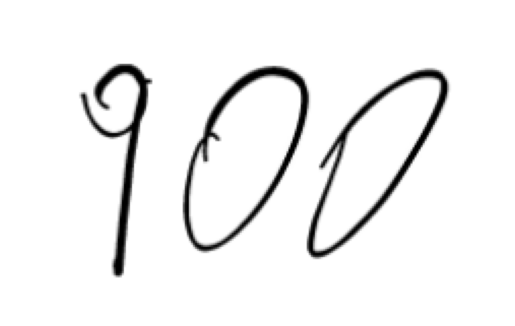

----

ERROR!!!
number of detected digits: 5 (6)


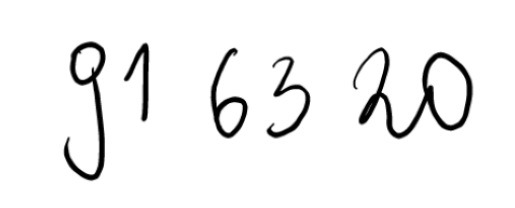

----



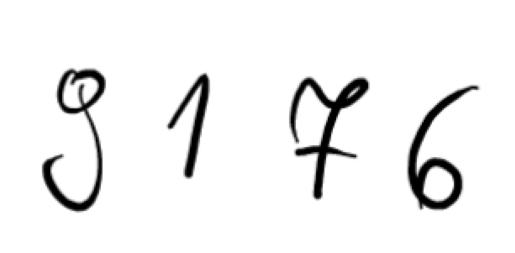

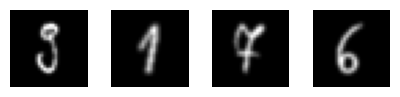

True: 9176
Prediction: 8176
----



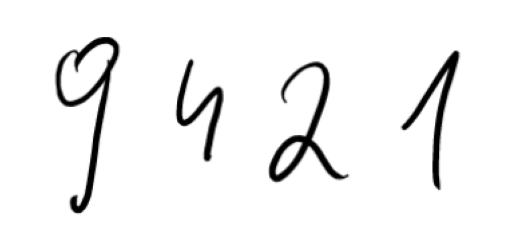

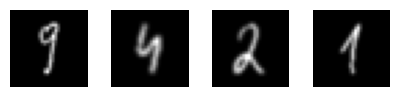

True: 9421
Prediction: 1421
----



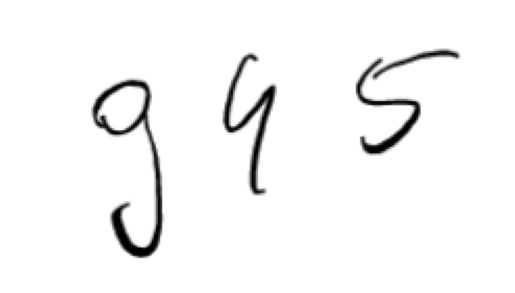

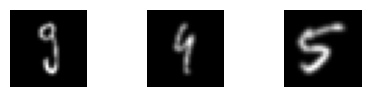

True: 945
Prediction: 818
----



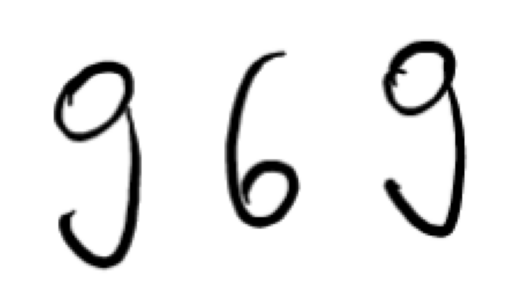

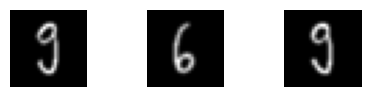

True: 969
Prediction: 368
----



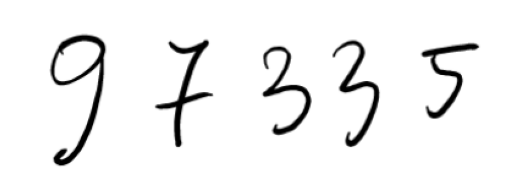

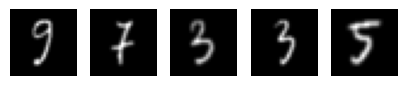

True: 97335
Prediction: 37335
----



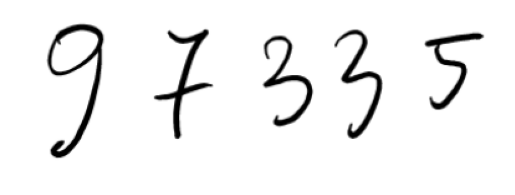

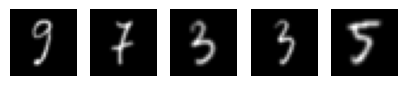

True: 97335
Prediction: 17335
----



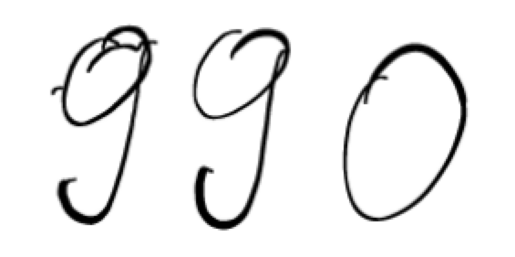

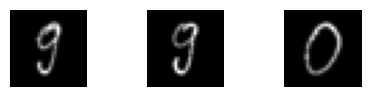

True: 990
Prediction: 380
----

Number of wrong splits: 2 of 86


In [18]:
digit_size,margin,blur_ksize, new_height = best_params

whole_num_res = []
digit_res = []

wrong_split = 0
for p in image_paths:
    label = p.split("\\")[-1].split("-")[0]  # np. "987"
    label_list = list(label)
    
    img = Image.open(p).convert('L')
    
    img_resized = my_pr.resize(img,new_height=new_height)
    digits = my_pr.split_to_digits(img_resized)    
    digits = my_pr.prepare_digits_for_mnist(digits,blur_ksize=blur_ksize,n=digit_size,margin=margin)
       
    
    if len(digits) != len(label_list):
        print("ERROR!!!")
        print(f"number of detected digits: {len(digits)} ({len(label_list)})")
        plt.imshow(np.array(img), cmap='gray')
        plt.axis('off')
        plt.show()
        print("----\n")
        wrong_split +=1
        continue
    
    number = []
    result = []
    
    for i,d in zip(label_list,digits):
        d_tensor = torch.tensor(d).unsqueeze(0)
        output = model_loaded(d_tensor)
        pred = torch.argmax(output, dim=1).item()
        result.append((int(i), int(pred)))
        number.append(pred)
        
    number = int(''.join(str(n) for n in number))
    digit_res = digit_res + result
    global_res = len([(x,y) for x ,y in result if x==y])/len(result)
    whole_num_res.append((int(label), number, global_res))
    
    if global_res<1:
        plt.imshow(np.array(img), cmap='gray')
        plt.axis('off')
        plt.show()
        plt.figure(figsize=(5, 1))
        for i, d in enumerate(digits):
            plt.subplot(1, len(digits), i + 1)
            plt.imshow(d, cmap="gray")
            plt.axis("off")
        plt.show()
    
        print("True:",label)
        print("Prediction:",number)
        print("----\n")
    
print(f"Number of wrong splits: {wrong_split} of {len(image_paths)}")

Accuracy: 0.8052


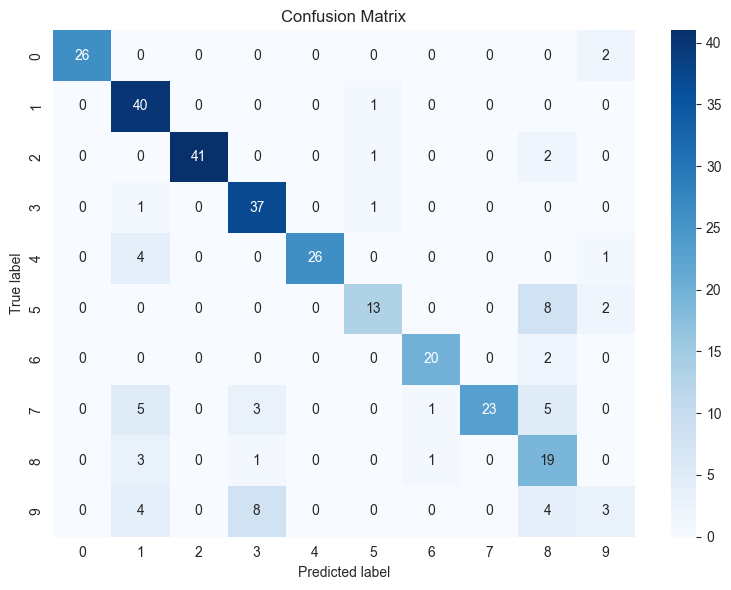

In [19]:
correct = sum(1 for t, p in digit_res if t == p)
total = len(digit_res)

accuracy = correct / total if total > 0 else 0.0

print(f"Accuracy: {accuracy:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt

num_classes = 10

confusion = np.zeros((num_classes, num_classes), dtype=int)

for true, pred in digit_res:
    confusion[true, pred] += 1

plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(10),
    yticklabels=range(10)
)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Fraction of good predictions for whole numbers: 51.19%


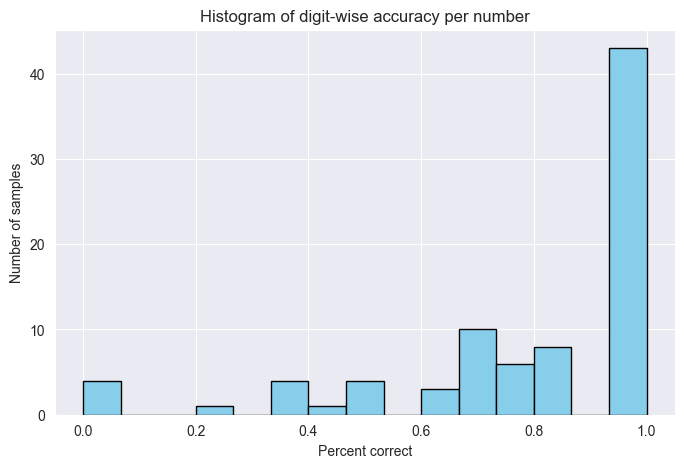

In [20]:
percent_values = [x[2] for x in whole_num_res]  
num_correct = sum(1 for v in percent_values if v == 1.0)
percent_correct = num_correct / len(percent_values) * 100

print(f"Fraction of good predictions for whole numbers: {percent_correct:.2f}%")

plt.figure(figsize=(8, 5))
plt.hist(percent_values, bins=15, color='skyblue', edgecolor='black')
plt.xlabel("Percent correct")
plt.ylabel("Number of samples")
plt.title("Histogram of digit-wise accuracy per number")
plt.show()